In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\frame

In [2]:
#load dataet
iris = load_iris()
iris_x, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
train_x,test_x,train_y,test_y = train_test_split(iris_x,iris_y,test_size=0.33,random_state=42)


In [3]:
#numFeatures is the number of features in our input data
#
numFeatures = train_x.shape[1]

#numLabels is the number of classes our data points can be in
#
numLabels = train_y.shape[1]

#placeholders
x = tf.placeholder(tf.float32,[None,numFeatures])
y_gold = tf.placeholder(tf.float32, [None,numLabels])

In [4]:
w = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

In [5]:
#Randomly sample from a normal distribution with standard devaiation 0.01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                      mean=0,
                                      stddev=0.01,
                                      name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                   mean=0,
                                   stddev=0.01,
                                   name="bias"))

In [6]:
#three-componet breakdown of the Logistic Regression equation

apply_weights_OP = tf.matmul(x,weights,name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP,bias,name="add_bias")
activation_OP = tf.nn.sigmoid(add_bias_OP,name="activation")

In [7]:
#training
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                         global_step=1,
                                         decay_steps=train_x.shape[0],
                                         decay_rate=0.95,
                                         staircase=True)

cost_OP = tf.nn.l2_loss(activation_OP-y_gold, name="squared_error_cost")

#defining the gradient descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)


In [9]:
#create the tensorflow session
sess = tf.Session()

#Initialization the weights and biases
init_OP = tf.global_variables_initializer()

#initialize all tensorflow varaibles
sess.run(init_OP)

In [11]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(y_gold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [15]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(700):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={x: train_x, y_gold: train_y})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={x: train_x, y_gold: train_y})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={x: test_x, 
                                                                y_gold: test_y})))

step 0, training accuracy 0.333333, cost 33.0347, change in cost 33.0347
step 10, training accuracy 0.616162, cost 29.8794, change in cost 3.15532
step 20, training accuracy 0.646465, cost 27.9597, change in cost 1.91973
step 30, training accuracy 0.646465, cost 26.3428, change in cost 1.61682
step 40, training accuracy 0.646465, cost 25.0015, change in cost 1.34134
step 50, training accuracy 0.646465, cost 23.8939, change in cost 1.10756
step 60, training accuracy 0.646465, cost 22.9771, change in cost 0.916874
step 70, training accuracy 0.646465, cost 22.2128, change in cost 0.764223
step 80, training accuracy 0.646465, cost 21.5701, change in cost 0.642769
step 90, training accuracy 0.646465, cost 21.024, change in cost 0.546036
step 100, training accuracy 0.666667, cost 20.5554, change in cost 0.46859
step 110, training accuracy 0.666667, cost 20.1493, change in cost 0.406132
step 120, training accuracy 0.666667, cost 19.794, change in cost 0.35533
step 130, training accuracy 0.666

C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


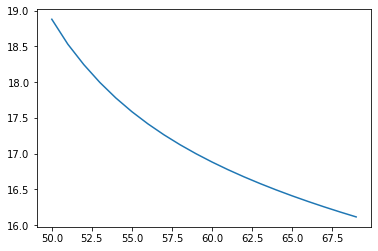

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()